In [1]:
import json
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence,pack_padded_sequence,pad_packed_sequence
import torch.nn as nn # for network layers
import math
import numpy as np
import matplotlib.pyplot as plt

import sklearn.ensemble
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pandas as pd
import random

# 1. import data

In [2]:
def get_data(filepath):
    with open(filepath, 'r') as f:
        file_data = json.load(f)
    f.close()
    func_data=[]
    func_label=[]
    func_name=[]
    for i,j in file_data.items():
        print(i)
        func_data.append(np.array([n[0] for m,n in j["features"].items()],dtype=np.float32))
        func_label.append(j['label'])
        func_name.append(i)
    print(len(func_data[0]))
    print(len(func_label))
    return np.array(func_data,dtype=np.float32),np.array(func_label,dtype=np.float32), np.array(func_name)

def get_features_names(filepath):
    with open(filepath, 'r') as f:
        file_data = json.load(f)
    f.close()
    
    for i,j in file_data.items():
        #num=0
        for k in j["features"]:
            #num+=1
            #print(num)
            func_features_name=[k for k in j["features"]]
        break
    return func_features_name

In [3]:
#check The ratio of the number of 0 to 1 data in train_data
def check_ratio(label_data):
    num0=0
    num1=0
    for i in label_data:
        if i==0:
            num0+=1
        else:
            num1+=1
    print('class0:',num0/len(label_data), 'class1:',num1/len(label_data),num0,num1 )

In [ ]:
#train data
filepath=r'C:\Users\thisi\PycharmProjects\Sum23teamlab\ACL\optimizer3_unselect_lld_features\new_func\func_train_list.json'
func_data_train,func_label_train,func_name_train=get_data(filepath)

In [ ]:
#test data
filepath = r'C:\Users\thisi\PycharmProjects\Sum23teamlab\ACL\optimizer3_unselect_lld_features\new_func\func_test_list.json'
func_data_test,func_label_test,func_name_test=get_data(filepath)

In [6]:
func_features_name=get_features_names(filepath)
print(func_features_name) 
print(len(func_features_name))#152
for i in range(len(func_features_name)):
    func_features_name[i]=str(i)+'.'+func_features_name[i]

['F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F1amplitudeLogRelF0_sma3nz_amean', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean', 'F1bandwidth_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean', 'F1frequency_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean', 'F2frequency_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean', 'F3bandwidth_sma3nz_stddevNorm', 'F3frequ

In [ ]:
#get oversampling data
import copy #!!!
func_data_train_over=copy.deepcopy(func_data_train)
func_label_train_over=copy.deepcopy(func_label_train)
class1_list=[]
for i in range(len(func_data_train)): #len(train_data) 7672-4025
    if func_label_train[i]==1:
        print(func_data_train_over.size,len(func_data_train_over))
        func_data_train_over=np.append(func_data_train_over,[func_data_train[i]],axis=0)
        #print(func_data_train[i])
        func_label_train_over=np.append(func_label_train_over,func_label_train[i])

In [8]:
check_ratio(func_label_train)
check_ratio(func_label_train_over)
check_ratio(func_label_test)

class0: 0.6682344743489244 class1: 0.3317655256510757 7672 3809
class0: 0.5017658600392413 class1: 0.49823413996075866 7672 7618
class0: 0.653899721448468 class1: 0.346100278551532 939 497


# 2.train RF

In [9]:
def train_rf(func_data,func_label,num_str):
    forest = sklearn.ensemble.RandomForestClassifier(
        n_estimators=141, criterion="entropy",random_state=0, oob_score=True
    ) #91 191
    forest.fit(func_data, func_label)
    print('num_str')
    prec, rec, f1, _ = sklearn.metrics.precision_recall_fscore_support(
        func_label,forest.predict(func_data), average=None 
    )
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print(func_label)
    print(forest.predict(func_data))
    print(type(func_label))
    print(type(forest.predict(func_data)))
    return forest

In [10]:
forest1=train_rf(func_data_train,func_label_train,'train1')

num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
forest2=train_rf(func_data_train_over,func_label_train_over,'train2')

num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 3. test RF(forest1 and forest2)

In [12]:
def test_rf(forest,test_data,test_label,num_forest,num_test):
    print('---',num_forest,',',num_test,'---') #forest,test
    prec, rec, f1, _ = sklearn.metrics.precision_recall_fscore_support(
        test_label,forest.predict(test_data), average=None 
    )
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print('confusion_matrix:')
    print(sklearn.metrics.confusion_matrix(test_label,forest.predict(test_data) ))
    print('accuracy:')
    acc=sklearn.metrics.accuracy_score(test_label,forest.predict(test_data))
    print(sklearn.metrics.accuracy_score(test_label,forest.predict(test_data) ))
    print()
    return f1,acc

In [13]:
f1_1,acc1=test_rf(forest1,func_data_test,func_label_test,'forest1','test')
f1_2,acc2=test_rf(forest2,func_data_test,func_label_test,'forest2','test')

--- forest1 , test ---
Precision: [0.7189232  0.82080925]
Recall: [0.96698616 0.28571429]
F1-score: [0.82470481 0.4238806 ]
confusion_matrix:
[[908  31]
 [355 142]]
accuracy:
0.7311977715877437

--- forest2 , test ---
Precision: [0.76642984 0.75483871]
Recall: [0.91906283 0.47082495]
F1-score: [0.83583535 0.57992565]
confusion_matrix:
[[863  76]
 [263 234]]
accuracy:
0.7639275766016713



# 4.select features base on forest2

In [14]:
from sklearn.inspection import permutation_importance

In [34]:
def print_importance(forest,func_data,func_label,features_name):
    #start_time = time.time()
    result = permutation_importance(
        forest, func_data,func_label, n_repeats=10, random_state=42, n_jobs=2
    )
    forest_importances = pd.Series(result.importances_mean, index=features_name )
    print('forest_importances',forest_importances)
    forest_importances_sort=forest_importances.sort_values(ascending=False) #ascending=False
    print('forest_importances',forest_importances)
    fig, ax = plt.subplots(figsize=(19, 10))
    forest_importances_sort.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()
    im_list3=[]
    for i in range(len(forest_importances_sort)):
        if forest_importances_sort[i]>0:
            print(forest_importances_sort.index[i].split('.')[0])
            im_list3.append(int(forest_importances_sort.index[i].split('.')[0]))
    return forest_importances_sort

def get_new_data(im_comb, func_data_train,func_data_test,func_features_name,shuffle_flag):
    iml=im_comb
    if shuffle_flag=='true':
        random.shuffle(iml)
        print(iml)
    else:
        print(iml)
    
    important_feat_list=iml
    func_data_train_selectedf=[]
    print(len(func_data_train))
    for i in func_data_train:
        temp=[]
        for j in important_feat_list:
            temp.append(i[j])
        func_data_train_selectedf.append(np.array(temp) )
    func_data_train_selectedf=np.array(func_data_train_selectedf) 
    print(len(func_data_train_selectedf[0]))

    func_data_test_selectedf=[]
    print(type(func_data_test[0][0]))
    for i in func_data_test:
        temp=[]
        for j in important_feat_list:
            temp.append(i[j])
        func_data_test_selectedf.append(np.array(temp) )
    func_data_test_selectedf=np.array(func_data_test_selectedf) 
    print(len(func_data_test_selectedf[0]))

    features_name_selected=[]
    for i in important_feat_list:
        features_name_selected.append(func_features_name[i])
    #print(features_name_selected)
    print(len(features_name_selected))
    return func_data_train_selectedf,func_data_test_selectedf,features_name_selected

def retrain_retest_rf(func_data_train_selectedf,func_data_test_selectedf):
    forest=train_rf(func_data_train_selectedf,func_label_train_over,'train1')#146,
    f1, acc=test_rf(forest,func_data_test_selectedf,func_label_test,'forest2','test4')
    return forest, acc

In [35]:
#initialize variables
acc_old=acc2
len_old=len(func_features_name)
forest3=forest2
func_data_test_selectedf=func_data_test
features_name_selected=func_features_name

In [ ]:
while True:
    forest_importances_sort=print_importance(forest3,func_data_test_selectedf,func_label_test,features_name_selected)

    im_comb=[]
    im_value=[]
    for i in range(len(forest_importances_sort)):
        if forest_importances_sort[i]>0:
            im_value.append( forest_importances_sort[i])
            print(forest_importances_sort.index[i].split('.')[0])
            im_comb.append(int(forest_importances_sort.index[i].split('.')[0]))
    if len(im_comb)-len_old==0:
        im_comb=im_comb[:-1]
        
    len_old=len(im_comb)
    print(len(im_comb),len(im_value))
    func_data_train_selectedf,func_data_test_selectedf,features_name_selected=get_new_data(im_comb, func_data_train_over,func_data_test,func_features_name,'true')
    forest3, acc=retrain_retest_rf(func_data_train_selectedf,func_data_test_selectedf)
    if acc>acc_old:
        acc_old=acc
    if abs(acc_old-acc)>0.1:
        break

In [54]:
print(acc_old) 

0.7896935933147632


In [55]:
#get the features lists:
selected_features_list=[133, 137, 143, 93, 24, 41, 142, 87, 120, 50, 75, 30, 149, 131, 78, 117, 59, 85, 123, 65, 135, 38, 109, 141, 49]
print(len(selected_features_list))
#print important features
for i in selected_features_list:
    print(func_features_name[i])

25
133.mfcc8_sma3_amean
137.mfcc9_sma3_amean
143.slopeV0-500_sma3nz_amean
93.mfcc18_sma3_amean
24.F3bandwidth_sma3nz_amean
41.hammarbergIndexV_sma3nz_stddevNorm
142.slopeUV500-1500_sma3nz_amean
87.mfcc17V_sma3nz_amean
120.mfcc5V_sma3nz_stddevNorm
50.loudness_sma3_meanFallingSlope
75.mfcc14V_sma3nz_amean
30.MeanUnvoicedSegmentLength
149.spectralFluxV_sma3nz_stddevNorm
131.mfcc8V_sma3nz_amean
78.mfcc14_sma3_stddevNorm
117.mfcc4_sma3_amean
59.mfcc10V_sma3nz_amean
85.mfcc16_sma3_amean
123.mfcc6V_sma3nz_amean
65.mfcc11_sma3_amean
135.mfcc9V_sma3nz_amean
38.equivalentSoundLevel_dBp
109.mfcc2_sma3_amean
141.slopeUV0-500_sma3nz_amean
49.loudness_sma3_amean


# 5. test and evaluations

In [23]:
def print3classes(wrongfile0,wrongfile1,thefile):
    # all data distribution
    print('---raw test data distribution:')
    lrna=0
    lsna=0
    lcna=0
    lra=0
    lsa=0
    lca=0
    lennum0=0
    lennum1=0
    for i in thefile: #print(i[3],i[7:10])
        if i[3]=='2' or i[3]=='4': #na
            if i[7:10] in spontaneous_na :
                lsna+=1
            elif i[7:10] in command_control_na:
                lcna+=1
            elif i[7:10] in read_na:
                lrna+=1
            else:
                print(i)
            lennum0+=1
        if i[3]=='1' or i[3]=='3': #a
            if i[7:10] in spontaneous_a :
                lsa+=1
            elif i[7:10] in command_control_a:
                lca+=1
            elif i[7:10] in read_a:
                lra+=1
            else:
                print(i)
            lennum1+=1

    print('class0:',lrna,lsna,lcna)
    print(lrna/lennum0,lsna/lennum0,lcna/lennum0)
    print('class1:',lra,lsa,lca)
    print(lra/lennum1,lsa/lennum1,lca/lennum1)
    print()
    
    print('---class 0 preditions distribution:')
    print(len(wrongfile0))
    lennum=len(wrongfile0)
    rna=0
    sna=0
    cna=0
    for i in wrongfile0: #sober
        #print(i[3],i[7:10])
        if i[7:10] in spontaneous_na :
            sna+=1
        elif i[7:10] in command_control_na:
            cna+=1
        elif i[7:10] in read_na:
            rna+=1
        else:
            print(i)
    print(rna,sna,cna)
    #print(rna/lennum,sna/lennum,cna/lennum)
    print(1-rna/lrna,1-sna/lsna,1-cna/lcna)
    print('---class 1 preditions distribution:')
    print(len(wrongfile1))
    lennum=len(wrongfile1)
    ra=0
    sa=0
    ca=0
    for i in wrongfile1: #sober
        if i[7:10] in spontaneous_a :
            sa+=1
        elif i[7:10] in command_control_a:
            ca+=1
        elif i[7:10] in read_a:
            ra+=1
        else:
            print(i)
    print(ra,sa,ca)
    #print(ra/lennum,sa/lennum,ca/lennum)
    print(1-ra/lra,1-sa/lsa,1-ca/lca)
    print()
    
    print('---all test preditions distribution:')
    print(1-((rna+ra)/(lrna+lra)),1-((sna+sa)/(lsna+lsa)),1-((cna+ca)/(lcna+lca)))
    print((rna+ra),(sna+sa),(cna+ca))
    print((lrna+lra),(lsna+lsa),(lcna+lca))

def get_wrongfile(truey,predy,thefile):
    thewrong0=[]
    thewrong1=[]
    print(len(truey),len(predy))
    for i in range(len(truey)):
        print(truey[i],predy[i])
        if truey[i]!=predy[i]:
            if truey[i]==0:
                thewrong0.append(i)
            else:
                thewrong1.append(i)
    # print(thewrong0)
    # print(thewrong1)    

    wrongfile0=[]
    for i in thewrong0:
        wrongfile0.append(thefile[i])

    wrongfile1=[]
    for j in thewrong1:
        wrongfile1.append(thefile[j])
    return  wrongfile0, wrongfile1

In [24]:
read_a = ['001','003', '004', '006', '007', '008','009', '011', '012', '013', '015', '016', '017', '019','020','021','023','024','029','030'] #read numbers, address, words, sentences, credit card numbers, auto numbers
spontaneous_a = ['002', '014', '005','010','018'] 
command_control_a = ['022','025','026','027','028'] 

read_na = ['001','003','004','006','007','008','009','011','012','013','015', '016', '017', '019','020','021','023','024','026','027','028', '031','032','033','035','036','037','039','040','041','044','050','051','052','056','057','058','059','060','029']
spontaneous_na = ['002','014','022','034', '005', '010', '018','025','030','038'] 
command_control_na = ['042','043','045','046','047','048','049','053','054','055']

### 1).forest 1: with all data

In [25]:
truey=func_label_test
predy=forest1.predict(func_data_test)
wrongfile0,wrongfile1=get_wrongfile(truey,predy,func_name_test)

print3classes(wrongfile0,wrongfile1,func_name_test)

1436 1436
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.

### 2).forest 2: with oversampling data

In [28]:
truey=func_label_test
predy=forest2.predict(func_data_test)
wrongfile0,wrongfile1=get_wrongfile(truey,predy,func_name_test)

print3classes(wrongfile0,wrongfile1,func_name_test)

1436 1436
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.

### 3).forest 3: with oversampling data with selected features

In [56]:
im_comb=selected_features_list
func_data_train_selectedf,func_data_test_selectedf,features_name_selected=get_new_data(im_comb, func_data_train_over,func_data_test,func_features_name,'false')
forest3,acc3=retrain_retest_rf(func_data_train_selectedf,func_data_test_selectedf)

[133, 137, 143, 93, 24, 41, 142, 87, 120, 50, 75, 30, 149, 131, 78, 117, 59, 85, 123, 65, 135, 38, 109, 141, 49]
15290
25
<class 'numpy.float32'>
25
25
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79906103 0.76280323]
Recall: [0.90628328 0.5694165 ]
F1-score: [0.8493014  0.65207373]
confusion_matrix:
[[851  88]
 [214 283]]
accuracy:
0.7896935933147632



forest_importances 133.mfcc8_sma3_amean                     0.042967
137.mfcc9_sma3_amean                     0.020195
143.slopeV0-500_sma3nz_amean             0.027019
93.mfcc18_sma3_amean                     0.017409
24.F3bandwidth_sma3nz_amean              0.026045
41.hammarbergIndexV_sma3nz_stddevNorm    0.016783
142.slopeUV500-1500_sma3nz_amean         0.018245
87.mfcc17V_sma3nz_amean                  0.018593
120.mfcc5V_sma3nz_stddevNorm             0.015599
50.loudness_sma3_meanFallingSlope        0.015042
75.mfcc14V_sma3nz_amean                  0.022214
30.MeanUnvoicedSegmentLength             0.011142
149.spectralFluxV_sma3nz_stddevNorm      0.049234
131.mfcc8V_sma3nz_amean                  0.016713
78.mfcc14_sma3_stddevNorm                0.011421
117.mfcc4_sma3_amean                     0.015320
59.mfcc10V_sma3nz_amean                  0.015738
85.mfcc16_sma3_amean                     0.016783
123.mfcc6V_sma3nz_amean                  0.011142
65.mfcc11_sma3_amean           

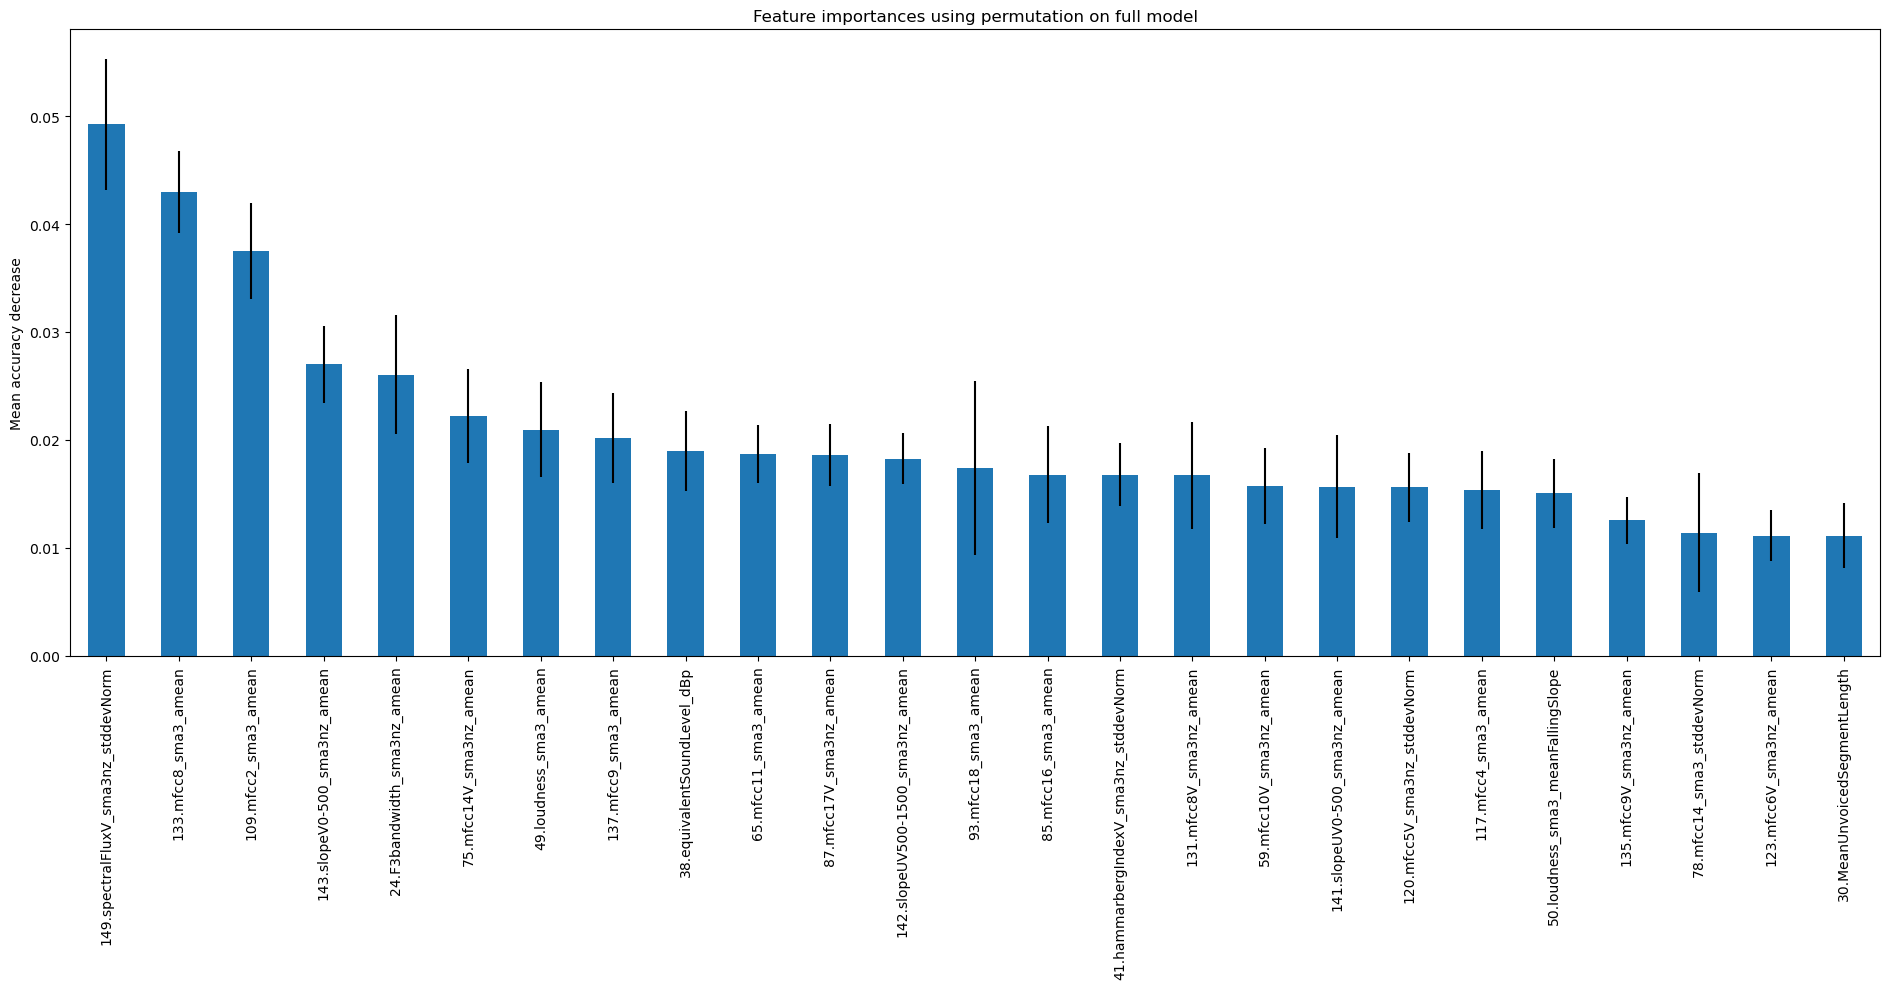

149
133
109
143
24
75
49
137
38
65
87
142
93
85
41
131
59
141
120
117
50
135
78
123
30


In [57]:
forest_importances_sort=print_importance(forest3,func_data_test_selectedf,func_label_test,features_name_selected)

In [58]:
truey=func_label_test
predy=forest3.predict(func_data_test_selectedf)
wrongfile0,wrongfile1=get_wrongfile(truey,predy,func_name_test)

print3classes(wrongfile0,wrongfile1,func_name_test)

1436 1436
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.

In [65]:
list1=[]
list2=[]
for i in range(len(forest_importances_sort)):
    if forest_importances_sort[i]>0:
        #print(forest_importances_sort[i])
        list2.append(forest_importances_sort[i])
        #print(forest_importances_sort.index[i])
        list1.append(forest_importances_sort.index[i].split('.')[1])
        
        #im_list3.append(int(forest_importances_sort.index[i].split('.')[0]))
print(list1)
print(list2)

['spectralFluxV_sma3nz_stddevNorm', 'mfcc8_sma3_amean', 'mfcc2_sma3_amean', 'slopeV0-500_sma3nz_amean', 'F3bandwidth_sma3nz_amean', 'mfcc14V_sma3nz_amean', 'loudness_sma3_amean', 'mfcc9_sma3_amean', 'equivalentSoundLevel_dBp', 'mfcc11_sma3_amean', 'mfcc17V_sma3nz_amean', 'slopeUV500-1500_sma3nz_amean', 'mfcc18_sma3_amean', 'mfcc16_sma3_amean', 'hammarbergIndexV_sma3nz_stddevNorm', 'mfcc8V_sma3nz_amean', 'mfcc10V_sma3nz_amean', 'slopeUV0-500_sma3nz_amean', 'mfcc5V_sma3nz_stddevNorm', 'mfcc4_sma3_amean', 'loudness_sma3_meanFallingSlope', 'mfcc9V_sma3nz_amean', 'mfcc14_sma3_stddevNorm', 'mfcc6V_sma3nz_amean', 'MeanUnvoicedSegmentLength']
[0.049233983286908034, 0.04296657381615594, 0.037534818941504136, 0.027019498607242287, 0.0260445682451253, 0.02221448467966568, 0.02096100278551528, 0.02019498607242336, 0.01894150417827294, 0.018662952646239496, 0.018593314763231162, 0.01824512534818936, 0.017409470752089096, 0.016782729805013896, 0.016782729805013864, 0.01671309192200552, 0.01573816155

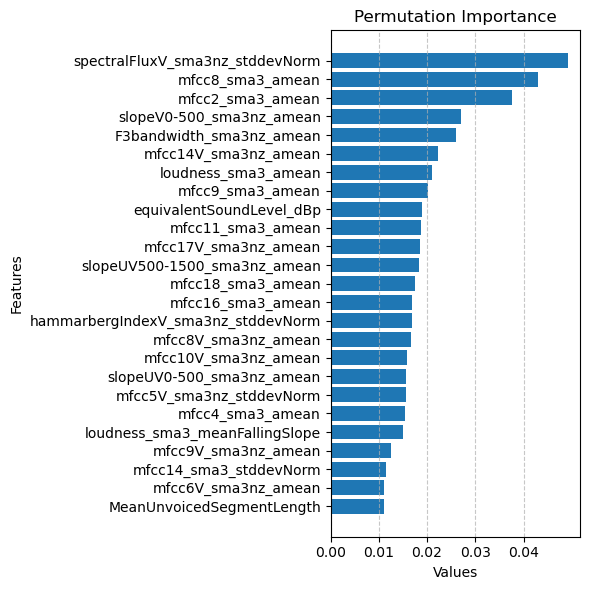

In [66]:
import matplotlib.pyplot as plt

# Data
features = list1
values = list2
# Create a bar plot
plt.figure(figsize=(6, 6))  # Adjust the figure size
#plt.barh(features, values)
bars = plt.barh(features, values)
plt.xlabel('Values')
plt.ylabel('Features')  # Increase font size for Y-axis labels
plt.title('Permutation Importance')  # Increase font size for title
plt.gca().invert_yaxis()
plt.xticks([i * 0.01 for i in range(5)])  # Set x-axis ticks at intervals of 0.005
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()


plt.tight_layout()
# Show the plot
plt.show()